In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train_df = pd.read_excel("data/train.xlsx")
test1_df = pd.read_excel("data/testA.xlsx")
test2_df = pd.read_excel("data/testB.xlsx")

In [3]:
train_y = train_df[train_df.columns[-1]]
train_y.shape

(800,)

In [4]:
new_column = test1_df.columns
train_df = train_df[new_column]
train_id = train_df['ID']
test1_id = test1_df['ID']
test2_id = test2_df['ID']
train_df.drop(['ID'], axis=1, inplace=True)
test1_df.drop(['ID'], axis=1, inplace=True)
test2_df.drop(['ID'], axis=1, inplace=True)

In [5]:
train_df = train_df[train_y>1.8]
train_y = train_y[train_y>1.8]

In [6]:
names = train_df.columns
dtypes = train_df.dtypes
floatn = []
for i in range(len(names)):
    n = names[i]
    d = dtypes[i]
    if 'float' in str(d):
        floatn.append(n)
print(len(floatn))

5182


In [7]:
dfX = pd.concat([train_df, test1_df, test2_df], axis=0)
dfX.shape

(1511, 5952)

In [8]:
maxs = []
mins = []
float_of_year = []
float_of_year_1 = []
for n in floatn:
    c = dfX[n]
    r = c[c.notnull()].values
    r0 = int(r[0])
    r1 = int(r[-1])
    if r[0]>1e10:
        float_of_year_1.append(n)
    if (str(r0)[:4]=='2017' and str(r1)[:4]=='2017') or (str(r0)[:4]=='2016' and str(r1)[:4]=='2016'):
        float_of_year.append(n)
print(len(float_of_year), len(float_of_year_1))

46 47


In [9]:
dfX[float_of_year].shape

(1511, 46)

In [10]:
set(float_of_year_1)- set(float_of_year)

{'220X151'}

In [11]:
c = dfX['220X151']
print(np.sum(c.isnull()))
r = c[c.notnull()]
print(np.mean(r), np.std(r), np.max(r), np.min(r))

848
3042338195152.119 78277416674268.86 2.01707022338e+15 5.0


In [12]:
print(np.sum(r>3042338195152.119))

1


In [13]:
dfX1 = copy.copy(dfX)

In [14]:
error = []
for n in floatn:
    c = dfX[n]
    x = np.sum(c.isnull())
    if x < 700:
        r = np.abs(c[c.notnull()])
        tmpm = np.mean(r)
        tmpa = np.max(r)
        if tmpa/tmpm > 10:
            error.append(n)
print(len(error))

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


117


5


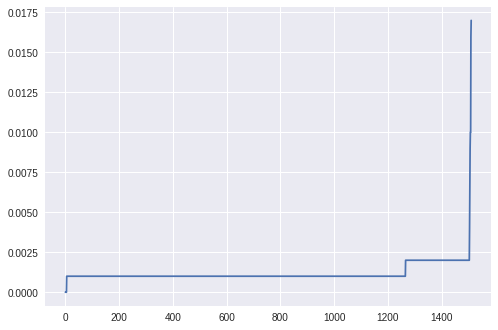

In [25]:
c = dfX[error[6]]
r = c[c.notnull()]
r = np.sort(r)
print(np.sum(r==0))
#r = r[r<0.01]
plt.plot(np.arange(len(r)), r)
plt.show()

In [26]:
noterror = []
for n in error:
    c = dfX[n]
    r = np.abs(c[c.notnull()])
    r1 = np.sort(r)
    rl = len(r)
    if rl == 0:
        print("empty")
        continue
    start = r1[rl-1]
    for i in range(1, rl):
        j = rl-1-i
        cur = r1[j]
        if cur == 0:
            start = 0
            break
        if start / cur < 10:
            break
        else:
            start = cur
    x = np.sum(r>=start)
    if x < 10:
        if start != 0:
            noterror.append(n)
print(len(noterror))

101


In [27]:
remain = list(set(error)-set(noterror))
print(len(remain))

16


In [48]:
c = dfX[remain[16]]
r = c[c.notnull()]
r = np.sort(r)
print(np.sum(r==0))
#r = r[r<500]
plt.plot(np.arange(len(r)), r)
plt.show()

IndexError: list index out of range

In [85]:
print(np.sum(dfX[remain[0]]==dfX[remain[12]]))

1511


In [94]:
len(floatn)

5182

In [49]:
# it is the value that to be fixed by near value
r14 = remain[14]
r14

'344X53'

In [50]:
c = dfX[r14]
r = np.sort(c[c.notnull()])
tmpm = r[-1]
dfX[c==tmpm] = r[-2]

In [51]:
np.max(dfX[r14][dfX[r14].notnull()])

18.399999999999999

In [52]:
r3 = remain[3]
print(r3)
c = dfX[r3]
dfX[c==0] = 0
dfX[c!=0] = 1
dfX[r3] = dfX[r3].astype(np.int64)
c = dfX[r3]
print(np.sum(c==0), np.sum(c==1))

360X708
554 957


In [53]:
print(r14, r3)

344X53 360X708


In [59]:
remr = copy.copy(remain)

In [54]:
del remain[14]
remain

['420X133',
 '360X698',
 '312X329',
 '360X708',
 '210X109',
 '360X696',
 '420X112',
 '360X706',
 '360X700',
 '210X111',
 '400X158',
 '312X341',
 '420X108',
 '312X314',
 '360X704']

In [55]:
del remain[3]
remain

['420X133',
 '360X698',
 '312X329',
 '210X109',
 '360X696',
 '420X112',
 '360X706',
 '360X700',
 '210X111',
 '400X158',
 '312X341',
 '420X108',
 '312X314',
 '360X704']

In [56]:
dfX.drop(remain, axis=1, inplace=True)
dfX.shape

(1511, 5938)

In [57]:
for n in noterror:
    c = dfX[n]
    r = c[c.notnull()]
    x = np.sum(r<0)
    if x > 0:
        print(n, x)

In [58]:
dfX[noterror]

,210X29,210X57,210X58,210X59,210X67,210X73,210X75,210X85,210X86,210X87,...,750X1425,750X1426,750X1428,750X1429,750X1444,750X1445,750X1447,750X1448,750X1450,750X1451
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
noterror[0]

'210X29'

In [65]:
tmpn = copy.copy(noterror[0])
tmpc = copy.copy(dfX[noterror[0]])
print(tmpn, tmpc.shape)

210X29 (1511,)


In [66]:
dfX.drop(noterror, axis=1, inplace=True)
print(dfX.shape)

(1511, 5837)


In [67]:
dfX[tmpn] = tmpc
print(dfX.shape)

(1511, 5838)


In [68]:
c = dfX[tmpn]
dfX[tmpn][c==1] = 1
dfX[tmpn][c!=1] = 0
dfX[tmpn] = dfX[tmpn].astype(np.int64)
print(dfX[tmpn].dtype)

int64


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
for n in float_of_year:
    dfX[n] = dfX[n].astype(np.int64)
    print(dfX[n].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [78]:
names = train_df.columns
dts = train_df.dtypes
drop_names = []
year = []
ratio = 0.1
for i in range(len(names)):
    n = names[i]
    tp = dts[i]
    trd = train_df[n]
    ted = test1_df[n]
    if 'object' == str(tp):
        continue
    else:
        misstr = np.sum(trd.isnull())/500
        misste = np.sum(ted.isnull())/100
        if np.abs(misstr-misste) > ratio:
            drop_names.append(n)
        else:
            if 'int' in str(tp):
                if str(train_df[n][0])[:4] == '2017' and str(train_df[n][499])[:4] == '2017':
                    year.append(n)
            else:
                trrd = trd[trd.notnull()]
                terd = ted[ted.notnull()]
                m1 = np.mean(trrd)
                s1 = np.std(trrd)
                m2 = np.mean(terd)
                s2 = np.std(terd)
                if np.abs(m1-m2)>ratio*np.abs(m1) and np.abs(s1-s2)>ratio*np.abs(s1):
                    drop_names.append(n)
print(len(drop_names))
print(len(year))

2328
40


In [77]:
np.sum(dfX[float_of_year].isnull().values)

0

In [80]:
dfxnames = dfX.columns
drop_names = list((set(drop_names) & set(dfxnames)))
dfX.drop(drop_names, axis=1, inplace=True)
dfX.shape

(1511, 3586)

In [82]:
allyear = list(set(float_of_year) | set(year))
print(len(allyear))

86


In [85]:
allyear = list(set(allyear) & set(dfX.columns))
len(allyear)

80

In [86]:
for n in allyear:
    d = dfX[n].dtype
    if 'int' not in str(d):
        dfX[n] = dfX[n].astype(np.int64)
    print(dfX[n].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [92]:
names = train_df.columns
dfs = train_df.dtypes

In [93]:
# ints or strings
ints = []
for i in range(len(names)):
    if 'int' in str(dfs[i]) or 'object' in str(dfs[i]):
        ints.append(names[i])
print(len(ints))

770


In [94]:
ints = list(set(dfX.columns) & set(ints))
print(len(ints))

592


In [96]:
remains1 = []
remains2 = []
tobedrop = []

for n in ints:
    lu1 = len(train_df[n].unique())
    lu2 = len(dfX[n].unique())
    if lu1 < 10 and lu1 > 1:
        remains1.append(n)
    if lu2 < 10 and lu2 > 1:
        remains2.append(n)
    if lu1 != lu2:
        tobedrop.append(n)
    
print(len(remains1), len(remains2), len(tobedrop), len(year))

132 592 540 40


In [97]:
toberemain = list(set(remains1) & set(remains2) - set(tobedrop))
print(len(toberemain))

52


In [98]:
dfx_year = dfX[allyear]

In [99]:
def dict2list(dic:dict):
    ''' 将字典转化为列表 '''
    keys = dic.keys()
    vals = dic.values()
    lst = [(key, val) for key, val in zip(keys, vals)]
    return lst

def LastRemainJudge(column):
    unique = set(column)
    uf = {}
    for u in unique:
        uf[u] = 0
    for c in column:
        uf[c] += 1
    sl = sorted(dict2list(uf), key = lambda x:x[1], reverse=True)
    x = sl[0][1]/len(column)
    sl = np.array(sl)
    if x < 0.8:
        #print(sl[:, 1]/len(column))
        return True
    else:
        return False

In [101]:
lm1 = []
lm2 = []
for n in toberemain:
    if LastRemainJudge(train_df[n]):
        lm1.append(n)
    if LastRemainJudge(dfX[n]):
        lm2.append(n)
print(len(lm1), len(lm2), len(set(lm1)&set(lm2)))

22 52 22


In [103]:
names = dfX.columns
dts = dfX.dtypes
dfx_float_n = []
dfx_onehot_n = list(set(lm1) & set(lm2))
print(len(dfx_onehot_n))
for i in range(len(names)):
    n = names[i]
    d = dts[i]
    if 'float' in str(d):
        dfx_float_n.append(n)
print(len(dfx_float_n))
dfx_float = dfX[dfx_float_n]
dfx_onehot = dfX[dfx_onehot_n]
print(dfx_float.shape, dfx_onehot.shape)

22
3494
(1511, 3494) (1511, 22)


In [104]:
drop_names = []
names = dfx_float.columns
for n in names:
    x = np.sum(dfx_float[n].isnull())
    if x > 500:
        drop_names.append(n)
print(len(drop_names))

0


In [105]:
means = []
stds = []
drop_names = []
names = dfx_float.columns
for n in names:
    c = dfx_float[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    means.append(tmpm)
    stds.append(tmps)
    if tmps == 0:
        drop_names.append(n)
print(len(set(means)), len(set(stds)))
print(len(drop_names))

1 1
0


In [106]:
dfx_float.drop(drop_names, axis=1, inplace=True)

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
# not move sames first, fill nan
added = set()
sames = []
for i in range(len(names)):
    tmpsl = []
    tmpsl.append(i)
    for j in range(i+1, len(names)):
        if means[i] == means[j] and stds[i] == stds[j]:
            if i not in added:
                added.add(i)
            if j not in added:
                added.add(j)
                tmpsl.append(j)
    if len(tmpsl) > 1:
        sames.append(tmpsl)
print(len(sames))

1


In [108]:
names = dfx_float.columns
drop_names = []
for i in sames:
    for j in i[1:]:
        drop_names.append(names[j])
print(len(drop_names))

3493


In [110]:
import copy
trainx_float = copy.copy(dfx_float)
trainx_float.drop(drop_names, axis=1, inplace=True)
print(trainx_float.shape)

(1511, 1)


In [111]:
names = trainx_float.columns
for n in names:
    c = trainx_float[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    assert tmps>0
    trainx_float[n][c.isnull()] = tmpm
print(np.sum(trainx_float.isnull().values))

0
